In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import json
from google.colab.patches import cv2_imshow

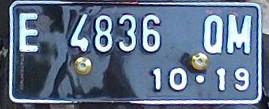

Nama File: E-4836-QM.jpg
Bentuk gambar asli: 109 x 269 x 3


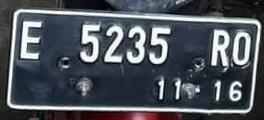

Nama File: E-5235-RO.jpg
Bentuk gambar asli: 120 x 264 x 3


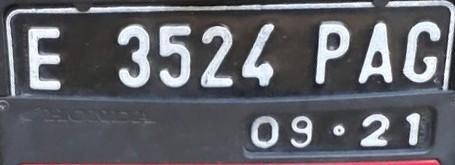

Nama File: E-3524-PAG.jpg
Bentuk gambar asli: 165 x 455 x 3


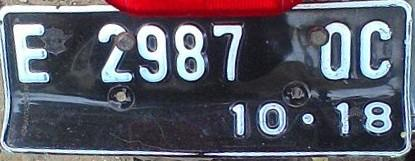

Nama File: E-2987-QC.jpg
Bentuk gambar asli: 161 x 415 x 3


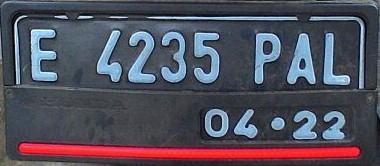

Nama File: E-4235-PAL.jpg
Bentuk gambar asli: 166 x 380 x 3


In [ ]:
# Tentukan path folder gambar
folder_path = '/content/drive/MyDrive/ML/'

# Dapatkan daftar file dalam folder
file_list = os.listdir(folder_path)

# Inisialisasi list untuk menyimpan data gambar yang sudah direshape
reshaped_images = []

# Loop melalui daftar file dan baca setiap gambar
for filename in file_list:
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Anda bisa menyesuaikan ekstensi yang diterima
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv2.imread(file_path)

        # Mendapatkan dimensi gambar
        h, w, ch = img.shape

        # Reshape gambar
        data = img / 255.0
        data = data.reshape(h * w, ch)

        # Menambahkan gambar yang sudah direshape ke dalam list
        reshaped_images.append(data)

        # Tampilkan gambar jika Anda inginkan
        cv2_imshow(img)

        # Cetak shape asli gambar
        print(f"Nama File: {filename}")
        print(f"Bentuk gambar asli: {h} x {w} x {ch}")

        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Jika Anda ingin menggabungkan semua gambar menjadi satu array, Anda dapat melakukannya di sini
# reshaped_images = np.concatenate(reshaped_images, axis=0)

In [ ]:
# Jika Anda ingin mencetak bentuk dari setiap gambar yang sudah direshape
for i, data in enumerate(reshaped_images):
    print(f"Nama File: {file_list[i]}")
    print(f"Bentuk gambar yang sudah direshape: {data.shape}")

Nama File: UTS
Bentuk gambar yang sudah direshape: (29321, 3)
Nama File: result_segmentation.json
Bentuk gambar yang sudah direshape: (31680, 3)
Nama File: .ipynb_checkpoints
Bentuk gambar yang sudah direshape: (75075, 3)
Nama File: E-4836-QM.jpg
Bentuk gambar yang sudah direshape: (66815, 3)
Nama File: E-5235-RO.jpg
Bentuk gambar yang sudah direshape: (63080, 3)


In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

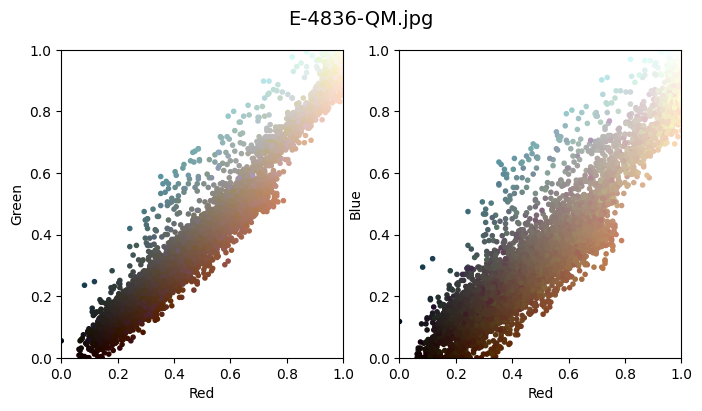

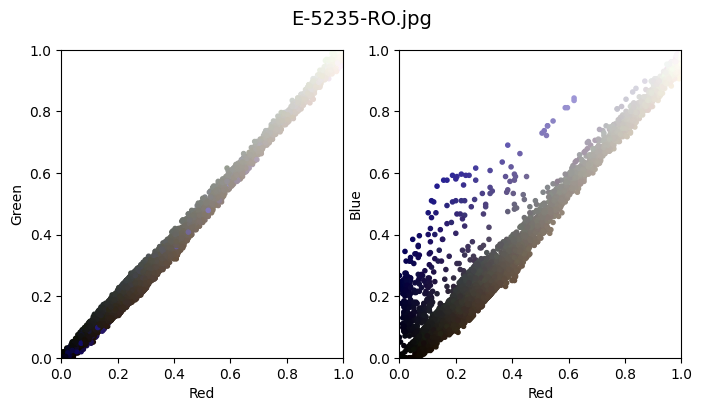

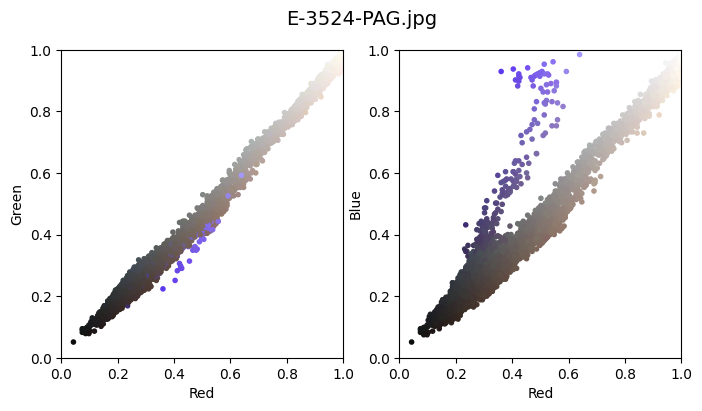

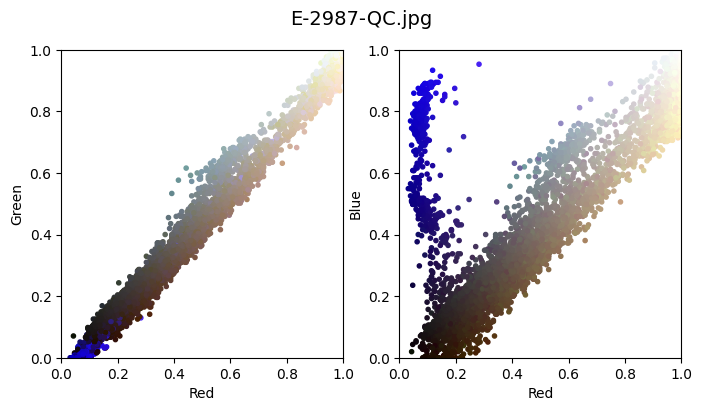

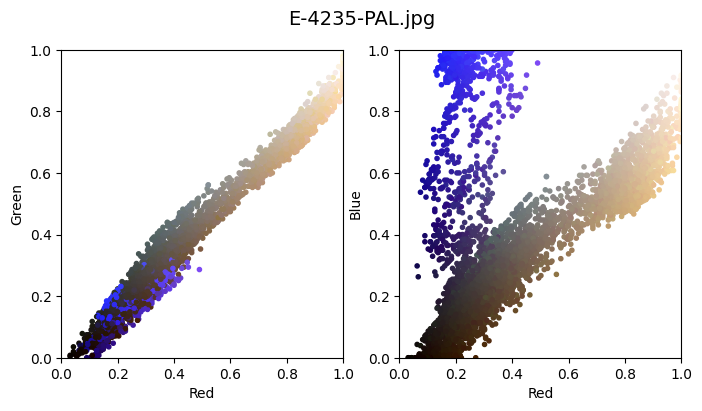

In [ ]:
for filename in file_list:
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Anda bisa menyesuaikan ekstensi yang diterima
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv2.imread(file_path)

        # Mendapatkan dimensi gambar
        h, w, ch = img.shape

        # Reshape gambar
        data = img / 255.0
        data = data.reshape(h * w, ch)

        # Memanggil fungsi plot_pixels untuk menganalisis persebaran warna
        plot_pixels(data, title=filename)

plt.show()  # Menampilkan plot untuk semua gambar

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


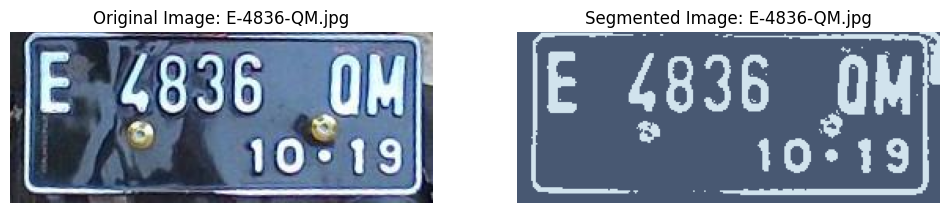

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


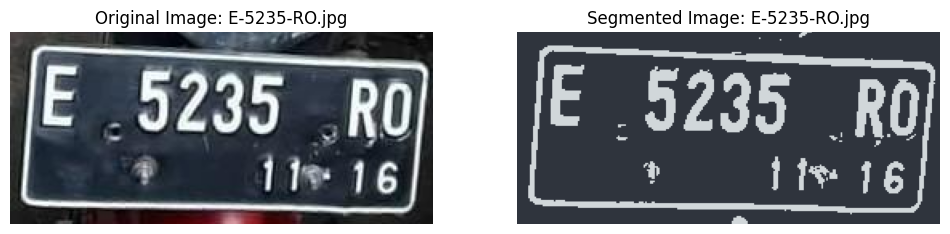

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


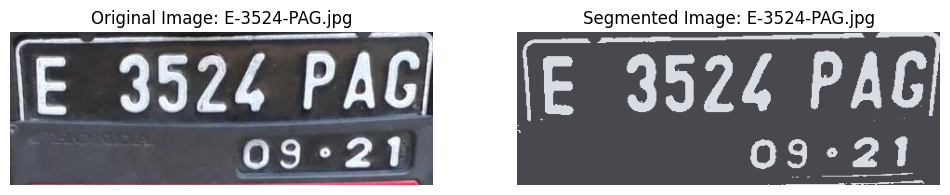

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


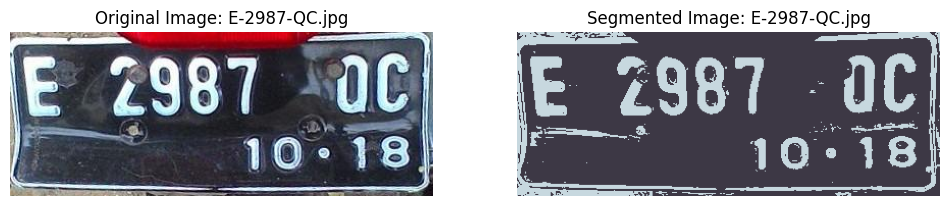

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


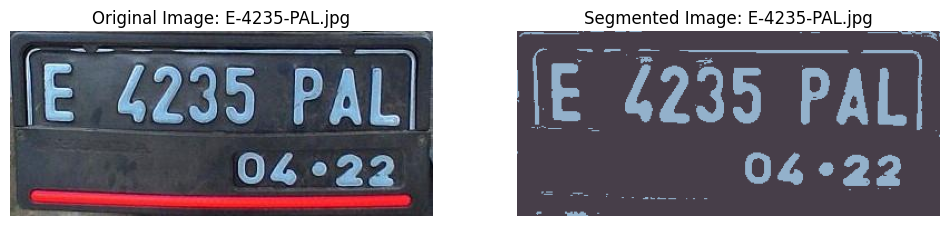

Hasil segmentasi telah disimpan.


In [ ]:
# Lokasi tempat Anda akan menyimpan hasil segmentasi
output_segmentation_directory = '/content/drive/MyDrive/ML/UTS/Segmentation_Results_KMeans/'

# Pastikan direktori output ada atau buat jika belum ada
if not os.path.exists(output_segmentation_directory):
    os.makedirs(output_segmentation_directory)

# Loop melalui gambar asli dan hasil segmentasi
for filename in file_list:
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv2.imread(file_path)

        # Mendapatkan dimensi gambar
        h, w, ch = img.shape

        # Reshape gambar
        data = img.reshape(-1, 3)

        # Inisiasi obyek KMeans
        cl_kmeans = KMeans(n_clusters=2, random_state=0)

        # Fit dan predict model
        y_kmeans = cl_kmeans.fit_predict(data)

        centers = cl_kmeans.cluster_centers_

        # Ganti warna gambar asli dengan warna yang dihasilkan oleh K-Means Clustering
        new_img = centers[y_kmeans].reshape(img.shape).astype(np.uint8)

        # Simpan hasil segmentasi
        output_path = os.path.join(output_segmentation_directory, filename)
        cv2.imwrite(output_path, new_img)

        # Tampilkan gambar asli dan hasil segmentasi
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"Original Image: {filename}")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Sembunyikan sumbu gambar

        plt.subplot(1, 2, 2)
        plt.title(f"Segmented Image: {filename}")
        plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Sembunyikan sumbu gambar

        plt.show()

# Selesai
print("Hasil segmentasi telah disimpan.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


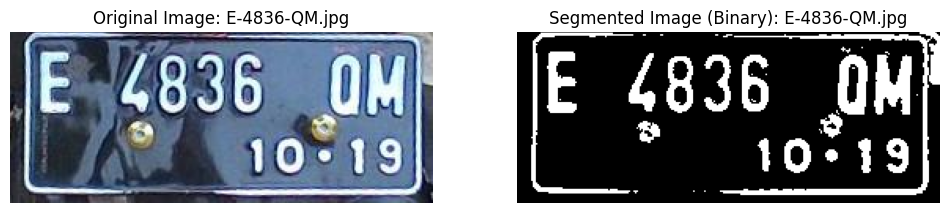

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


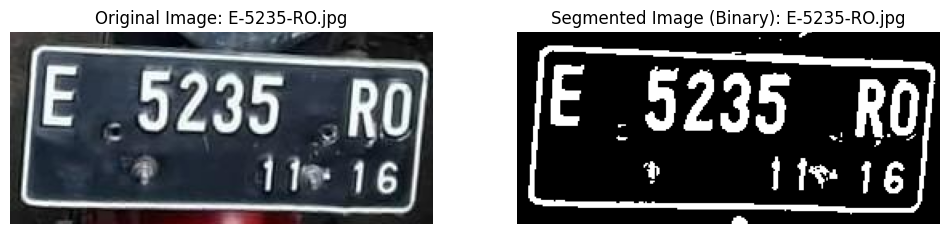

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


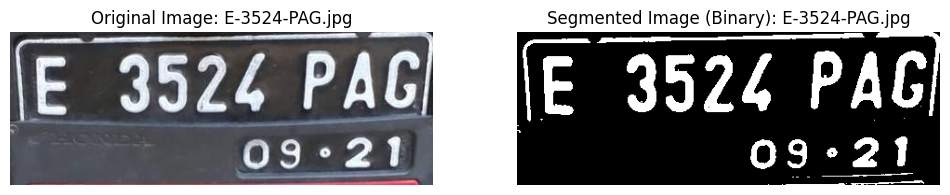

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


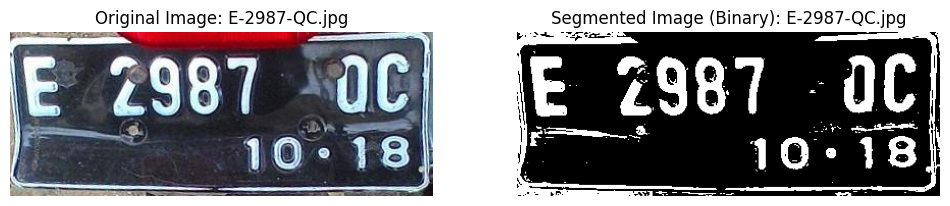

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


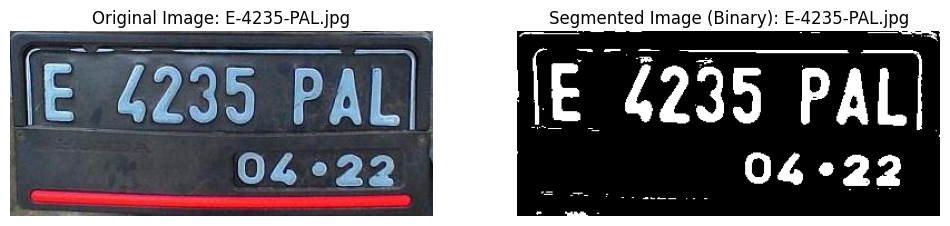

Hasil segmentasi telah disimpan.


In [ ]:
# Loop melalui gambar asli dan hasil segmentasi
for filename in file_list:
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Gabungkan path folder dengan nama file
        file_path = os.path.join(folder_path, filename)

        # Baca gambar
        img = cv2.imread(file_path)

        # Mendapatkan dimensi gambar
        h, w, ch = img.shape

        # Reshape gambar
        data = img.reshape(-1, 3)

        # Inisiasi obyek KMeans
        cl_kmeans = KMeans(n_clusters=2, random_state=0)

        # Fit dan predict model
        y_kmeans = cl_kmeans.fit_predict(data)

        centers = cl_kmeans.cluster_centers_

        # Ganti warna gambar asli dengan warna yang dihasilkan oleh K-Means Clustering
        new_img = centers[y_kmeans].reshape(img.shape).astype(np.uint8)

        # Konversi hasil segmentasi ke citra biner
        gray_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
        _, binary_img = cv2.threshold(gray_img, 90, 255, cv2.THRESH_BINARY)

        # Simpan hasil segmentasi biner
        output_path = os.path.join(output_segmentation_directory, filename)
        cv2.imwrite(output_path, binary_img)

        # Tampilkan gambar asli dan hasil segmentasi
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"Original Image: {filename}")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Sembunyikan sumbu gambar

        plt.subplot(1, 2, 2)
        plt.title(f"Segmented Image (Binary): {filename}")
        plt.imshow(binary_img, cmap='gray')
        plt.axis('off')  # Sembunyikan sumbu gambar

        plt.show()

# Selesai
print("Hasil segmentasi telah disimpan.")